# Python & SQL Analysis
※ If you solve a query-based problem using Pandas, it will be scored as zero.
- The same applies in reverse.

- In the Colab environment, markdown cells may not be displayed properly.
- Please use a local environment such as VS Code or refer to the provided image file instead.

- Scoring: Each question is worth 10 points, for a total of 80 points. Partial credit will not be given.

- Code Variations: Different coding approaches are accepted as long as they meet all requirements and produce the correct output.

In [27]:
# You may ignore these lines.
import warnings
warnings.filterwarnings('ignore')

In [28]:
import pandas as pd
display(pd.read_csv('./data/thelook_ecommerce_order.csv').head())
display(pd.read_csv('./data/thelook_ecommerce_user.csv').head())

,order_id,user_id,status,gender,created_at
0,69,65,Complete,F,2023-07-14 14:24:00+00:00
1,78,70,Complete,F,2023-11-26 16:57:00+00:00
2,199,175,Complete,F,2023-05-16 13:10:00+00:00
3,226,198,Complete,F,2023-09-25 01:18:00+00:00
4,227,198,Complete,F,2023-03-29 01:18:00+00:00


,id,country,latitude,longitude,state
0,67829,Brasil,-8.065346,-72.870949,Acre
1,36042,Brasil,-8.065346,-72.870949,Acre
2,96280,Brasil,-8.065346,-72.870949,Acre
3,43114,Brasil,-8.065346,-72.870949,Acre
4,29263,Brasil,-8.065346,-72.870949,Acre


---
# Q0. Write your name

In [29]:
# Firstname, Lastname
# Name: Hayoung Choi

---
# Q1. Data Preprocessing – Getting Location Information

In [30]:
# [Dataset]
# - 'users' Table from thelook_ecommerce_user.csv
# [Columns used]
# - Columns: latitude, longitude, state

# [First DataFrame]
# - Create a DataFrame by selecting the ['state', 'latitude', 'longitude'] columns from the original dataset.
# - Also display the dataframe shape information (as shown in the cell output).
# - Purpose: To retain only the location-related information from the original data.


# [Second DataFrame]
# - Remove duplicate entries from the first DataFrame based on ['latitude', 'longitude'].
# - Also display the dataframe shape information (as shown in the cell output).
# - Purpose: To check how many unique location entries exist per State.



In [131]:
# [Dataset]
df_order = pd.read_csv('./data/thelook_ecommerce_order.csv')
df_user = pd.read_csv('./data/thelook_ecommerce_user.csv')
print(df_user.shape)
df_user.head()



(5000, 5)


,id,country,latitude,longitude,state
0,67829,Brasil,-8.065346,-72.870949,Acre
1,36042,Brasil,-8.065346,-72.870949,Acre
2,96280,Brasil,-8.065346,-72.870949,Acre
3,43114,Brasil,-8.065346,-72.870949,Acre
4,29263,Brasil,-8.065346,-72.870949,Acre


In [132]:
# [First DataFrame]
users = df_user[['latitude', 'longitude', 'state']]
print(users.shape)
users.head()

(5000, 3)


,latitude,longitude,state
0,-8.065346,-72.870949,Acre
1,-8.065346,-72.870949,Acre
2,-8.065346,-72.870949,Acre
3,-8.065346,-72.870949,Acre
4,-8.065346,-72.870949,Acre


In [133]:
# [Second DataFrame]
users = users.drop_duplicates(['latitude', 'longitude'])
print(users.shape)
users.head()

(1016, 3)


,latitude,longitude,state
0,-8.065346,-72.870949,Acre
15,-8.325245,-71.553030,Acre
23,-9.857324,-69.437057,Acre
33,-9.945568,-67.835610,Acre
42,35.317684,136.767047,Aichi


In [ ]:
'''
[Hint]
1. When you want certain columns from Dataframe, you may use df[['A', 'B', 'C']]
2. Use drop_duplicates method to remove duplicates
'''

"\n[Hint]\n1. When you want certain columns from Dataframe, you may use df[['A', 'B', 'C']]\n2. Use drop_duplicates method to remove duplicates\n"

<img src="./images/Q1.png" width="40%">

---
# Q2. Data Preprocessing – Checking the Number of Users per Location

In [138]:
# [Dataset]
# thelook_ecommerce_user.csv'
# => thelook_ecommerce의 'users' Table

# [Result]
# - Group the data by 'latitude' and 'longitude' to calculate the number of users per location.
# - Purpose: To understand how many users are present at each unique location.
# - Since the goal is to count users, determine which aggregation function (e.g., sum, count, or nunique) is most appropriate.
# - Sort the resulting data in descending order based on the number of users.
# - Also, make sure to rename the columns accordingly in the final output.
df_user = pd.read_csv('./data/thelook_ecommerce_user.csv')
df_user = pd.DataFrame(df_user)
print(df_user.shape)
df_user.head()


(5000, 5)


,id,country,latitude,longitude,state
0,67829,Brasil,-8.065346,-72.870949,Acre
1,36042,Brasil,-8.065346,-72.870949,Acre
2,96280,Brasil,-8.065346,-72.870949,Acre
3,43114,Brasil,-8.065346,-72.870949,Acre
4,29263,Brasil,-8.065346,-72.870949,Acre


In [141]:
df_user = df_user.rename(columns={'id':'user_name'})

grouped_user = df_user.groupby(['latitude','longitude'])['user_name'].nunique().reset_index()
grouped_user = grouped_user.sort_values(by = 'user_name',ascending=False)   
print(grouped_user.shape)
grouped_user.head()

(1016, 3)


,latitude,longitude,user_name
142,31.914062,117.267601,59
140,31.891306,117.320511,50
132,31.830186,117.267413,47
138,31.877447,117.223794,39
304,33.900259,116.769997,38


In [118]:
'''
[Hint]
1. Use 'groupby' for data aggregation, and nunique() to count the number of unique users.
2. Use 'sort_values' to sort the aggregated data.
3. Use 'rename' to change column names in a DataFrame.
'''

"\n[Hint]\n1. Use 'groupby' for data aggregation, and nunique() to count the number of unique users.\n2. Use 'sort_values' to sort the aggregated data.\n3. Use 'rename' to change column names in a DataFrame.\n"

<img src="./images/Q2.png" width="60%">

---
# Q3. Data Preprocessing – Data Merging

In [144]:
# If you were unable to solve the problems in Q1 or Q2, please try to solve them using the provided files.
# [Provided files] Q1_result.csv, Q2_result.csv
import pandas as pd
display(pd.read_csv('./data_result/Q1_result.csv').head())
display(pd.read_csv('./data_result/Q2_result.csv').head())
df1 = pd.DataFrame(pd.read_csv('./data_result/Q1_result.csv'))
df2 = pd.DataFrame(pd.read_csv('./data_result/Q2_result.csv'))

,state,latitude,longitude
0,Acre,-8.065346,-72.870949
1,Acre,-8.325245,-71.553030
2,Acre,-9.857324,-69.437057
3,Acre,-9.945568,-67.835610
4,Aichi,35.317684,136.767047


,latitude,longitude,user_number
0,31.914062,117.267601,59
1,31.891306,117.320511,50
2,31.830186,117.267413,47
3,31.877447,117.223794,39
4,33.900259,116.769997,38


In [151]:
# [Data Used]
# (1) Q1 preprocessed data
# (2) Q2 preprocessed data

# [Purpose]
# Merge the two datasets into a single DataFrame using latitude and longitude as the key columns.
# You may refer to the course materials or online sources for merging.


# [Important Note]
# The number of rows in the merged DataFrame must not increase compared to the original Q1 and Q2 datasets.


In [150]:
pd.merge(df1,df2, on = ['latitude','longitude'])

,state,latitude,longitude,user_number
0,Acre,-8.065346,-72.870949,15
1,Acre,-8.325245,-71.553030,8
2,Acre,-9.857324,-69.437057,10
3,Acre,-9.945568,-67.835610,9
4,Aichi,35.317684,136.767047,1
...,...,...,...,...
1011,Bahia,-13.179466,-42.710694,9
1012,Bahia,-13.976677,-42.497357,8
1013,Bahia,-9.600617,-42.255133,9
1014,Bahia,-13.808923,-42.009178,10


In [ ]:
'''
[Hint]
1. Use pd.merge() for data merge
'''

'\n[Hint]\n1. Use pd.merge() for data merge\n'

<img src="./images/Q3.png" width="60%">

---
# Q4. SQL – Data Extraction and Join

In [3]:
# Q4. SQL – Data Extraction and Join

# All data preprocessing must be done strictly using SQL.

# [Goal]
# Create 3 DataFrames through SQL queries.

# [Database]
# Use the classicmodels database
# Follow below steps to set up 'classicmodels' database
# 1. Insert "mysqlsampledatabase.sql" query into your MySQLWorkbench (File Provided)

# [Tables]
# orders, orderdetails

# [Steps]
# connect the classicmodels database using mysql.connector

# (1) Display the orders DataFrame
# Load all columns from the orders table into a DataFrame.
# Display data information (as shown in the cell output).
# Show the top 5 rows of the DataFrame.

# (2) Display the orderdetails DataFrame
# Load all columns from the orderdetails table into a DataFrame.
# Display data information (as shown in the cell output).
# Show the top 5 rows of the DataFrame.

# (3) Create a joined DataFrame of orders and orderdetails
# Join all columns from orders and orderdetails into a new DataFrame.
# Join condition: orderNumber
# Perform the data extraction and join only using SQL queries (not Pandas merging).
# Display data information (as shown in the cell output).
# Show the top 5 rows of the DataFrame.

import warnings
warnings.filterwarnings('ignore')

%pip install mysql-connector-python


130.69s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [18]:
import mysql.connector
import pandas as pd
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Dkddl0302!',
    database='classicmodels'
)



In [56]:
#(1) orders dataframe
query = """
    select *
    from orders"""
result = pd.read_sql(query,con = conn)

print(result.shape)
result.head()




(326, 7)


,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber
0,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,None,363
1,10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128
2,10102,2003-01-10,2003-01-18,2003-01-14,Shipped,None,181
3,10103,2003-01-29,2003-02-07,2003-02-02,Shipped,None,121
4,10104,2003-01-31,2003-02-09,2003-02-01,Shipped,None,141


In [57]:
#(2)orderdetails DataFrame
query = """
    select *
    from orderdetails"""
result = pd.read_sql(query,con = conn)

print(result.shape)
result.head()






(2996, 5)


,orderNumber,productCode,quantityOrdered,priceEach,orderLineNumber
0,10100,S18_1749,30,136.00,3
1,10100,S18_2248,50,55.09,2
2,10100,S18_4409,22,75.46,4
3,10100,S24_3969,49,35.29,1
4,10101,S18_2325,25,108.06,4


In [58]:
#(3) Create a joined DataFrame of orders and orderdetails

query = """
    select *
    from orderdetails as o 
    join orders as od on o.orderNumber = od.orderNumber
    """
result = pd.read_sql(query,con = conn)

print(result.shape)
result.head()

(2996, 12)


,orderNumber,productCode,quantityOrdered,priceEach,orderLineNumber,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber
0,10100,S18_1749,30,136.00,3,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,None,363
1,10100,S18_2248,50,55.09,2,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,None,363
2,10100,S18_4409,22,75.46,4,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,None,363
3,10100,S24_3969,49,35.29,1,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,None,363
4,10101,S18_2325,25,108.06,4,10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128


In [ ]:
'''
[Hint]
Use
mysql.connector.connect(host= '',
                        user= '',
                        password='',
                        database='')

You can query using
pd.read_sql()
'''

"\n[Hint]\nUse \nmysql.connector.connect(host= '',\n                        user= '',\n                        password='',\n                        database='')\n\nYou can query using\npd.read_sql()\n"

<img src="./images/Q4.png" width="70%">

---
# Q5. SQL – Categorizing by Delivery Duration

In [59]:
# SQL – Categorizing by Delivery Duration

# All data preprocessing must be done strictly using SQL.

# [Goal]
# Classify data based on delivery duration.

# [Database]
# Use the classicmodels database

# [Tables]
# ORDERS, ORDERDETAILS

# [Steps]
# Add a SALES column : Calculate it using priceEach * quantityOrdered.
# Add a SHIPPING_SPEED column
# - SHIPPEDDATE - ORDERDATE <= 2 "Express"
# - SHIPPEDDATE - ORDERDATE between 3 and 5 days : "Standard"
# - Otherwise : "Delayed"
# No additional processing required for NULL values.

# [Result]
# Display the result as a DataFrame.

import warnings
warnings.filterwarnings('ignore')

In [96]:
query = """
with all_orders as (
    select 
        o.orderNumber, 
        o.productCode,
        o.quantityOrdered,
        o.priceEach,
        od.orderDate,
        od.shippedDate
    from orderdetails as o
    join orders as od on o.orderNumber = od.orderNumber
)
select 
    orderNumber, 
    orderDate,
    shippedDate,
    datediff(shippedDate, orderDate) as SHIPPING_SPEED,
    case 
        when datediff(shippedDate, orderDate) <= 2 then "Express"
        when datediff(shippedDate, orderDate) between 3 and 5 then "Standard"
        else "Delayed"
    end as SHIPPING_TYPE ,
    productCode,
    priceEach * quantityOrdered as SALES
from all_orders

"""

result = pd.read_sql(query,con = conn)


result

,orderNumber,orderDate,shippedDate,SHIPPING_SPEED,SHIPPING_TYPE,productCode,SALES
0,10100,2003-01-06,2003-01-10,4.0,Standard,S18_1749,4080.00
1,10100,2003-01-06,2003-01-10,4.0,Standard,S18_2248,2754.50
2,10100,2003-01-06,2003-01-10,4.0,Standard,S18_4409,1660.12
3,10100,2003-01-06,2003-01-10,4.0,Standard,S24_3969,1729.21
4,10101,2003-01-09,2003-01-11,2.0,Express,S18_2325,2701.50
...,...,...,...,...,...,...,...
2991,10425,2005-05-31,None,NaN,Delayed,S24_2300,6261.71
2992,10425,2005-05-31,None,NaN,Delayed,S24_2840,986.42
2993,10425,2005-05-31,None,NaN,Delayed,S32_1268,3435.39
2994,10425,2005-05-31,None,NaN,Delayed,S32_2509,553.52


In [ ]:
'''
[Hint]
You can use CASE WHEN to transform or represent data based on specific conditions.
'''

'\n[Hint]\nYou can use CASE WHEN to transform or represent data based on specific conditions.\n'

<img src="./images/Q5.png" width="60%">

---
# Q6. SQL Aggregation - Number of Orders and Customers by Country

[Note]
- Data preprocessing must be done using SQL.

[Goal]
- Aggregation by country.

[Database]
- Use the classicmodels database

[Tables]
- ORDERS, CUSTOMERS

[Steps]
- Only include records from orders where the status is 'Shipped'

[Aggregation Requirements]
- Count the number of orders per country
- Count the number of unique customers per country

[Result]
- Return results that match the expected output shown below

In [ ]:
"""
[Hint]
- You can use DISTINCT to count the number of unique users.
- Use JOIN to combine data in SQL.
- Use WHERE to set conditions in SQL.
"""

'\n[Hint]  \n- You can use DISTINCT to count the number of unique users.  \n- Use JOIN to combine data in SQL.  \n- Use WHERE to set conditions in SQL.\n'

In [98]:
query = """
    select
    c.country,
    count(o.orderNumber) as orders_count,
    count(distinct o.customerNumber) as unique_customers_count
from orders o
join customers c on o.customerNumber = c.customerNumber
where o.status = 'Shipped'
group by c.country
order by c.country;
    """
result = pd.read_sql(query,con = conn)

print(result.shape)
result.head()


(22, 3)


,country,orders_count,unique_customers_count
0,Australia,17,5
1,Austria,6,2
2,Belgium,6,2
3,Canada,7,3
4,Denmark,5,2


<img src="./images/Q6.png" width="40%">

---
# Q7. SQL Aggregation – Number of Employees by Country

In [99]:
# SQL Aggregation – Number of Employees by Country

# Data preprocessing must be done using SQL.

# [Goal]
# Aggregate and check the number of employees by country.

# [Database]
# Use the classicmodels database

# [Join Key]
# officecode

# [Tables]
# employees, offices

# [Result]
# Aggregated number of employees per country
# Sort the results in descending order based on the number of employees → must be done in SQL
# Column names must match the expected output shown in the cell → must be set in SQL

import warnings
warnings.filterwarnings('ignore')



In [102]:
query = """
    select 
    o.country as country,
    count(e.employeeNumber) as employee_number
from employees e
join offices o on e.officeCode = o.officeCode
group by o.country
order by employee_number DESC;

    """
result = pd.read_sql(query,con = conn)

print(result.shape)
result.head()


(5, 2)


,country,employee_number
0,USA,10
1,France,5
2,Australia,4
3,Japan,2
4,UK,2


In [ ]:
"""
[Hint]
- Use ORDER BY to sort data in SQL.
"""

'\n[Hint]  \n- Use ORDER BY to sort data in SQL.\n'

<img src="./images/Q7.png" width="40%">

---
# Q8. Visualization

In [ ]:
# Q8. Visualization

# If you were unable to solve Q7, try solving this question using the provided file.
# [Provided File] Q7_result.csv

# [Goal]
# Visualize the result data from Q7
# Create a graph that matches the format shown in the output

# [Visualization Details]
# Include: title, xlabel, and ylabel

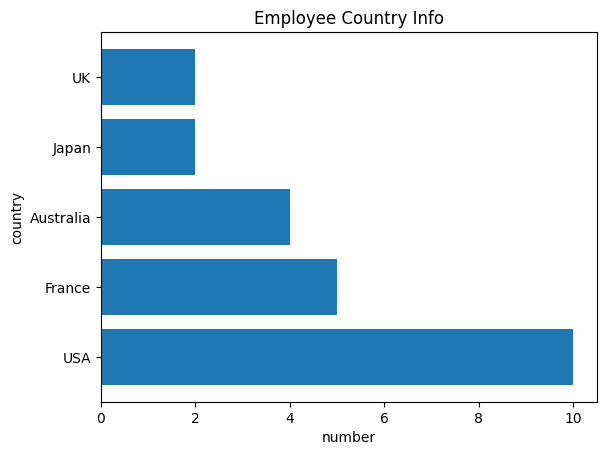

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

query = """
    select 
    o.country as country,
    count(e.employeeNumber) as employee_number
from employees e
join offices o on e.officeCode = o.officeCode
group by o.country
order by employee_number DESC;

    """
result = pd.read_sql(query,con = conn)

plt.barh(result['country'],result['employee_number'])
plt.title('Employee Country Info')
plt.xlabel('number')
plt.ylabel('country')
plt.show()

In [ ]:
"""
[Hint]
- You can use matplotlib and seaborn for data visualization.
- To create a horizontal bar chart, use `plt.barh()`.
- Use `title`, `xlabel`, and `ylabel` to set the chart title and axis labels.
"""

'\n[Hint]  \n- You can use matplotlib and seaborn for data visualization.  \n- To create a horizontal bar chart, use `plt.barh()`.  \n- Use `title`, `xlabel`, and `ylabel` to set the chart title and axis labels.\n'

<img src="./images/Q8.png" width="40%">

# ※ Lab Assignment Guidelines
[Important Notes for Lab Assignments]

※ The grading criteria for lab assignments are as follows:

1. Accuracy of Output Results

    - Check whether the output matches the provided expected result.
    - Note: Some datasets may have inherent variability (e.g., real-time data, AI-generated data); these are exceptions.
    
2. Complete Fulfillment of Requirements
    - All requirements stated in the problem must be fully reflected in your code.
    - Even minor elements should not be overlooked. Please write your code carefully, considering all details.

※ Summary

Therefore, do not miss any details mentioned in the problem, no matter how small, and make sure to address them in your solution.

In real-world data analysis work, attention to detail and accuracy are essential.

It is especially important to clearly define and manage conditions and column settings.

This lab assignment is designed to reflect those real-world expectations.

These criteria will be used to evaluate your assignment. Please keep them in mind when completing your work.

If any of these requirements are not met, the corresponding problem may be graded as incorrect (0 points).